In [25]:
import pandas as pd
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
def generate_transactions(n=1000):
    users=[f"user_{i}" for i in range(1,51)]
    categories=["Food","Shopping","Travel","Bills","Entertainment"]

    data=[]
    start_date=datetime(2025,1,1)
    for i in range(n):
        data.append({
            "transaction_id": random.randint(100000, 999999),
            "user_id": random.choice(users),
            "amount":round(random.uniform(50,5000),2),
            "category":random.choice(categories),
            "timestamp": start_date +  timedelta(days=random.randint(0,180))

        })
    return pd.DataFrame(data)
df=generate_transactions()
df.to_csv("transactions.csv", index=False)

In [27]:
df


,transaction_id,user_id,amount,category,timestamp
0,411271,user_10,3184.10,Shopping,2025-04-25
1,970289,user_23,947.04,Travel,2025-01-26
2,330250,user_30,2472.82,Bills,2025-06-14
3,166668,user_2,2905.70,Food,2025-01-21
4,240256,user_40,4112.06,Entertainment,2025-03-03
...,...,...,...,...,...
995,433201,user_37,3827.46,Shopping,2025-06-25
996,943348,user_49,793.66,Bills,2025-03-29
997,870323,user_31,3506.48,Shopping,2025-02-20
998,410213,user_10,945.14,Entertainment,2025-02-17


In [28]:
df=pd.read_csv("transactions.csv")

In [29]:
df.drop_duplicates(inplace=True)
df["timestamp"]=pd.to_datetime(df["timestamp"])

In [30]:
df


,transaction_id,user_id,amount,category,timestamp
0,411271,user_10,3184.10,Shopping,2025-04-25
1,970289,user_23,947.04,Travel,2025-01-26
2,330250,user_30,2472.82,Bills,2025-06-14
3,166668,user_2,2905.70,Food,2025-01-21
4,240256,user_40,4112.06,Entertainment,2025-03-03
...,...,...,...,...,...
995,433201,user_37,3827.46,Shopping,2025-06-25
996,943348,user_49,793.66,Bills,2025-03-29
997,870323,user_31,3506.48,Shopping,2025-02-20
998,410213,user_10,945.14,Entertainment,2025-02-17


In [31]:
df["day"]=df["timestamp"].dt.day
df["month"]=df["timestamp"].dt.month

In [32]:
df


,transaction_id,user_id,amount,category,timestamp,day,month
0,411271,user_10,3184.10,Shopping,2025-04-25,25,4
1,970289,user_23,947.04,Travel,2025-01-26,26,1
2,330250,user_30,2472.82,Bills,2025-06-14,14,6
3,166668,user_2,2905.70,Food,2025-01-21,21,1
4,240256,user_40,4112.06,Entertainment,2025-03-03,3,3
...,...,...,...,...,...,...,...
995,433201,user_37,3827.46,Shopping,2025-06-25,25,6
996,943348,user_49,793.66,Bills,2025-03-29,29,3
997,870323,user_31,3506.48,Shopping,2025-02-20,20,2
998,410213,user_10,945.14,Entertainment,2025-02-17,17,2


In [33]:
print(df)

     transaction_id  user_id   amount       category  timestamp  day  month
0            411271  user_10  3184.10       Shopping 2025-04-25   25      4
1            970289  user_23   947.04         Travel 2025-01-26   26      1
2            330250  user_30  2472.82          Bills 2025-06-14   14      6
3            166668   user_2  2905.70           Food 2025-01-21   21      1
4            240256  user_40  4112.06  Entertainment 2025-03-03    3      3
..              ...      ...      ...            ...        ...  ...    ...
995          433201  user_37  3827.46       Shopping 2025-06-25   25      6
996          943348  user_49   793.66          Bills 2025-03-29   29      3
997          870323  user_31  3506.48       Shopping 2025-02-20   20      2
998          410213  user_10   945.14  Entertainment 2025-02-17   17      2
999          764289  user_10  3218.26       Shopping 2025-01-13   13      1

[1000 rows x 7 columns]


In [34]:
df.to_csv("transactions.csv",index=False)
df.head()

,transaction_id,user_id,amount,category,timestamp,day,month
0,411271,user_10,3184.10,Shopping,2025-04-25,25,4
1,970289,user_23,947.04,Travel,2025-01-26,26,1
2,330250,user_30,2472.82,Bills,2025-06-14,14,6
3,166668,user_2,2905.70,Food,2025-01-21,21,1
4,240256,user_40,4112.06,Entertainment,2025-03-03,3,3


In [35]:
df=pd.read_csv("transactions.csv")
user_spend=df.groupby("user_id")["amount"].sum().reset_index()
category_spend=df.groupby("category")["amount"].sum().reset_index()
user_spend.head(), category_spend

(   user_id    amount
 0   user_1  55746.11
 1  user_10  69086.31
 2  user_11  70209.33
 3  user_12  49944.58
 4  user_13  61809.32,
         category     amount
 0          Bills  570978.09
 1  Entertainment  492832.20
 2           Food  585327.14
 3       Shopping  474681.52
 4         Travel  483502.01)

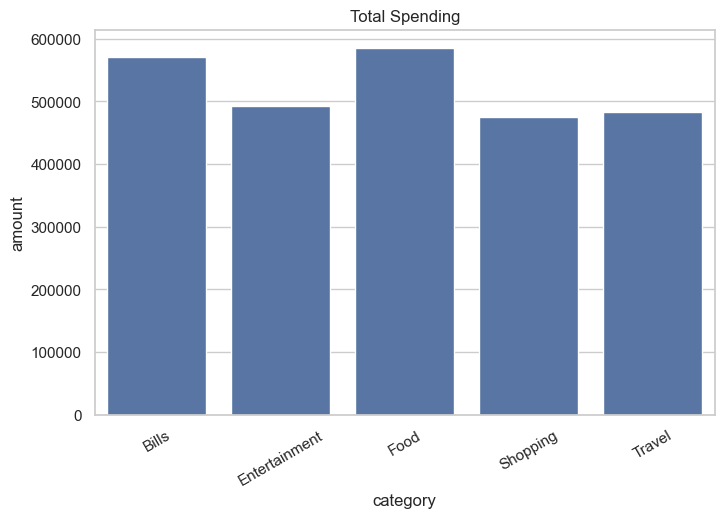

In [36]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(data=category_spend, x="category", y="amount")
plt.title("Total Spending")
plt.xticks(rotation=30)
plt.show()

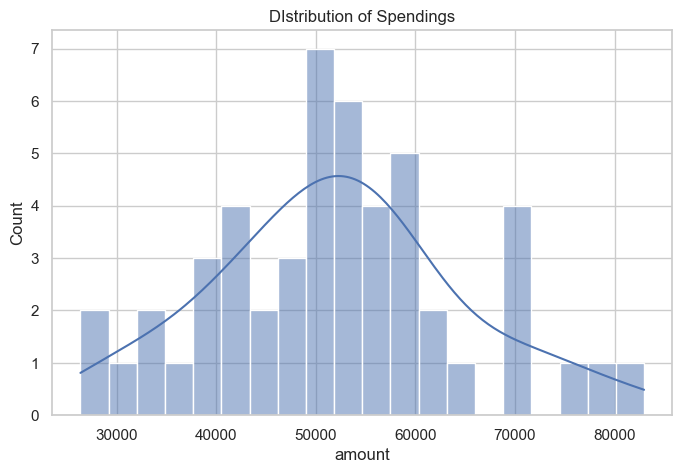

In [37]:
plt.figure(figsize=(8,5))
sns.histplot(user_spend["amount"], bins=20, kde=True)
plt.title("DIstribution of Spendings")
plt.show()

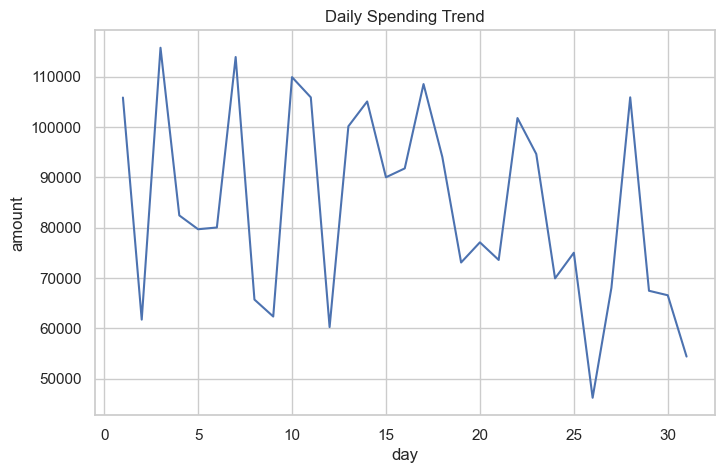

In [38]:
daily_spend=df.groupby("day")["amount"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=daily_spend, x="day", y="amount")
plt.title("Daily Spending Trend")
plt.show()